用qiskit做个简单的测试，Quantum teleportation。\
3个qubit分别为c,a,b。\
c为初始态，设定为1；b为目标态。\
ab纠缠态为01-10。

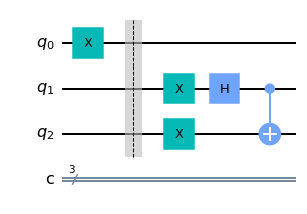

In [41]:
from qiskit import *
circuit=QuantumCircuit(3,3)
circuit.x(0)
circuit.barrier()
circuit.x(1)
circuit.h(1)
circuit.x(2)
circuit.cx(1,2)
circuit.draw('mpl')

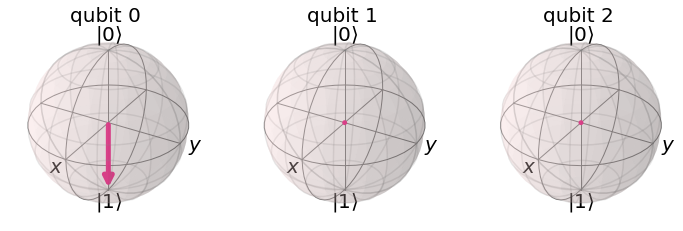

In [42]:
from qiskit.visualization import plot_bloch_multivector
statevector=Aer.get_backend('statevector_simulator')
result=execute(circuit,statevector).result()
vector=result.get_statevector()
plot_bloch_multivector(vector)

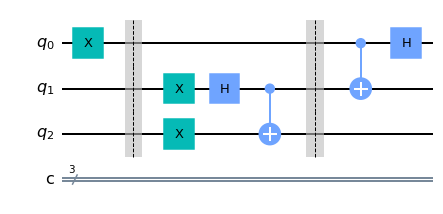

In [43]:
circuit.barrier()
circuit.cx(0,1)
circuit.h(0)
circuit.draw('mpl')

这里的h*cx门是转换到c，a的bell基。\
00+11=00，对b做x\
00-11=10，对b做y\
01+10=01，对b做z\
01-10=11，不操作\
等价于：\
先对c，a做x，然后\
c对b做cz\
a对b做cy

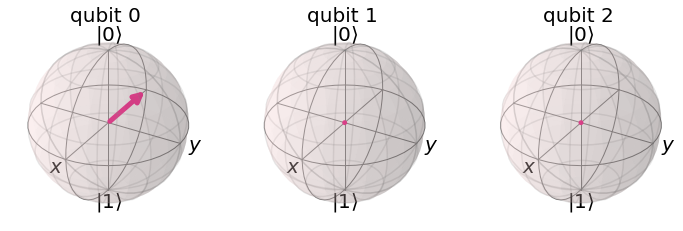

In [44]:
result=execute(circuit,statevector).result()
vector=result.get_statevector()
plot_bloch_multivector(vector)

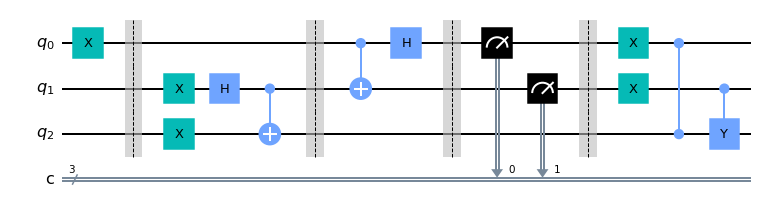

In [45]:
circuit.barrier()
circuit.measure([0,1],[0,1])
circuit.barrier()
circuit.x(0)
circuit.x(1)
circuit.cz(0,2)
circuit.cy(1,2)
circuit.draw('mpl')

因为b和ac是远离的，所以无法直接对abc系统操作。对ac测量之后的门，其实是经典通信加上对b的单独操控。

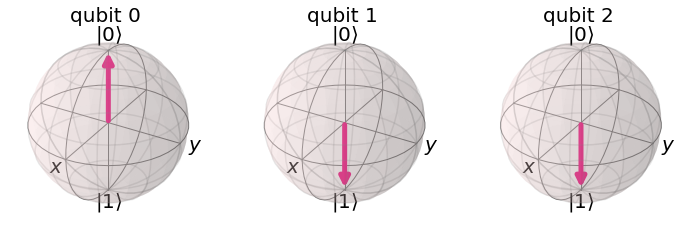

In [46]:
result=execute(circuit,statevector).result()
vector=result.get_statevector()
plot_bloch_multivector(vector)

{'111': 246, '100': 260, '101': 245, '110': 249}


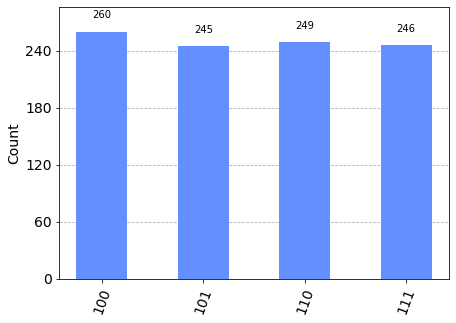

In [47]:
circuit.measure(2,2)
qasm=Aer.get_backend('qasm_simulator')
result=execute(circuit,qasm,shots=1000).result()
counts=result.get_counts()
print(counts)

from qiskit.visualization import plot_histogram
plot_histogram(counts)